In [ ]:
# import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv("Train_Test_IoT_Garage_Door.csv")
df.head()

,ts,date,time,door_state,sphone_signal,label,type
0,1556228553,25-Apr-19,14:42:33,closed,0,1,ddos
1,1556228558,25-Apr-19,14:42:38,closed,0,1,ddos
2,1556228563,25-Apr-19,14:42:43,closed,0,1,ddos
3,1556228568,25-Apr-19,14:42:48,closed,0,1,ddos
4,1556228578,25-Apr-19,14:42:58,closed,0,1,ddos


In [ ]:
# calculate duplicates 
dups = df.duplicated() 
# report if there are any duplicates 
print(dups.any()) 
# list all duplicate rows 
print(df[dups])
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)

True
               ts       date            time door_state sphone_signal  label  \
124    1556229495  25-Apr-19       14:58:15      closed             0      1   
126    1556229500  25-Apr-19       14:58:20      closed             0      1   
128    1556229505  25-Apr-19       14:58:25      closed             0      1   
130    1556229510  25-Apr-19       14:58:30      closed             0      1   
132    1556229515  25-Apr-19       14:58:35      closed             0      1   
...           ...        ...             ...        ...           ...    ...   
59582  1554203357   2-Apr-19     04:09:17        closed       false        0   
59583  1554203357   2-Apr-19     04:09:17          open        true        0   
59584  1554203357   2-Apr-19     04:09:17        closed       false        0   
59585  1554203357   2-Apr-19     04:09:17        closed       false        0   
59586  1554203357   2-Apr-19     04:09:17        closed       false        0   

         type  
124      ddos  
12

In [ ]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

               count  percentage
ts                 0         0.0
date               0         0.0
time               0         0.0
door_state         0         0.0
sphone_signal      0         0.0
label              0         0.0
type               0         0.0


In [ ]:
type('date')

str

In [ ]:
type('time')

str

In [ ]:
df['date'] = pd.to_datetime(df['date'])
print(df)

               ts       date            time door_state sphone_signal  label  \
0      1556228553 2019-04-25       14:42:33      closed             0      1   
1      1556228558 2019-04-25       14:42:38      closed             0      1   
2      1556228563 2019-04-25       14:42:43      closed             0      1   
3      1556228568 2019-04-25       14:42:48      closed             0      1   
4      1556228578 2019-04-25       14:42:58      closed             0      1   
...           ...        ...             ...        ...           ...    ...   
59307  1554203355 2019-04-02     04:09:15          open        true        0   
59421  1554203356 2019-04-02     04:09:16        closed       false        0   
59425  1554203356 2019-04-02     04:09:16          open        true        0   
59566  1554203357 2019-04-02     04:09:17          open        true        0   
59567  1554203357 2019-04-02     04:09:17        closed       false        0   

         type  
0        ddos  
1      

In [ ]:
dups = df.duplicated()

In [ ]:
print(dups.any())

False


In [ ]:
print(df[dups])

Empty DataFrame
Columns: [ts, date, time, door_state, sphone_signal, label, type]
Index: []


In [ ]:
print(df.shape)

(20751, 7)


In [ ]:
df.drop_duplicates(inplace=True)
print(df.shape)

(20751, 7)


In [ ]:
#Transform string to date
df['date'] = pd.to_datetime(df.date, format="%d-%m-%Y")

In [ ]:
#Extracting Year
df['year'] = df['date'].dt.year

#Extracting Month
df['month'] = df['date'].dt.month

#Extracting the weekday name of the date
df['day_name'] = df['date'].dt.day_name()

In [ ]:
# dealing with attribute time
#new data frame with split value columns
new = df['time'].str.split(':',n=2,expand=True)

In [ ]:
# making separate first name column from new data frame
df["hour"]= new[0]
df["min"]= new[1]
df["sec"]= new[2]

In [ ]:
df['month'] = df['month'].astype(int)

In [ ]:
df['hour'] = df['hour'].astype(int)

In [ ]:

df['hour_sin'] = np.sin((df.hour-1)*(2.*np.pi/12))
df['hour_cos'] = np.cos((df.hour-1)*(2.*np.pi/12))

df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [ ]:
df

,ts,date,time,door_state,sphone_signal,label,type,year,month,day_name,hour,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556228553,2019-04-25,14:42:33,closed,0,1,ddos,2019,4,Thursday,14,42,33,0.5,8.660254e-01,1.0,6.123234e-17
1,1556228558,2019-04-25,14:42:38,closed,0,1,ddos,2019,4,Thursday,14,42,38,0.5,8.660254e-01,1.0,6.123234e-17
2,1556228563,2019-04-25,14:42:43,closed,0,1,ddos,2019,4,Thursday,14,42,43,0.5,8.660254e-01,1.0,6.123234e-17
3,1556228568,2019-04-25,14:42:48,closed,0,1,ddos,2019,4,Thursday,14,42,48,0.5,8.660254e-01,1.0,6.123234e-17
4,1556228578,2019-04-25,14:42:58,closed,0,1,ddos,2019,4,Thursday,14,42,58,0.5,8.660254e-01,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59307,1554203355,2019-04-02,04:09:15,open,true,0,normal,2019,4,Tuesday,4,09,15,1.0,6.123234e-17,1.0,6.123234e-17
59421,1554203356,2019-04-02,04:09:16,closed,false,0,normal,2019,4,Tuesday,4,09,16,1.0,6.123234e-17,1.0,6.123234e-17
59425,1554203356,2019-04-02,04:09:16,open,true,0,normal,2019,4,Tuesday,4,09,16,1.0,6.123234e-17,1.0,6.123234e-17
59566,1554203357,2019-04-02,04:09:17,open,true,0,normal,2019,4,Tuesday,4,09,17,1.0,6.123234e-17,1.0,6.123234e-17


In [ ]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

               count  percentage
ts                 0         0.0
date               0         0.0
time               0         0.0
door_state         0         0.0
sphone_signal      0         0.0
label              0         0.0
type               0         0.0
year               0         0.0
month              0         0.0
day_name           0         0.0
hour               0         0.0
min                0         0.0
sec                0         0.0
hour_sin           0         0.0
hour_cos           0         0.0
month_sin          0         0.0
month_cos          0         0.0


In [ ]:
# drop columns 
df = df.drop(['ts', 'time','type','date','min','sec'], axis=1)

In [ ]:
df

,door_state,sphone_signal,label,year,month,day_name,hour,hour_sin,hour_cos,month_sin,month_cos
0,closed,0,1,2019,4,Thursday,14,0.5,8.660254e-01,1.0,6.123234e-17
1,closed,0,1,2019,4,Thursday,14,0.5,8.660254e-01,1.0,6.123234e-17
2,closed,0,1,2019,4,Thursday,14,0.5,8.660254e-01,1.0,6.123234e-17
3,closed,0,1,2019,4,Thursday,14,0.5,8.660254e-01,1.0,6.123234e-17
4,closed,0,1,2019,4,Thursday,14,0.5,8.660254e-01,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
59307,open,true,0,2019,4,Tuesday,4,1.0,6.123234e-17,1.0,6.123234e-17
59421,closed,false,0,2019,4,Tuesday,4,1.0,6.123234e-17,1.0,6.123234e-17
59425,open,true,0,2019,4,Tuesday,4,1.0,6.123234e-17,1.0,6.123234e-17
59566,open,true,0,2019,4,Tuesday,4,1.0,6.123234e-17,1.0,6.123234e-17


In [ ]:
# transform hour to int
df['hour'] = df['hour'].astype(int)

In [ ]:
type('hour')

str

In [ ]:
# transform int to string
df['label'] = df['label'].astype(str)

In [ ]:
df.sphone_signal.unique()

array(['0', '1', 'true  ', 'false  '], dtype=object)

In [ ]:
df['sphone_signal'] = df['sphone_signal'].astype(str)

In [ ]:
df.sphone_signal.replace(['true  ', 'false  '], ['1', '0'], inplace=True)

In [ ]:
df.sphone_signal.unique()


array(['0', '1'], dtype=object)

In [ ]:
# populate the numerical and categorical variables
num_list = []
cat_list = []
for column in df:
   if column != 'label': # separate lable
       if is_numeric_dtype(df[column]):
           num_list.append(column)
       elif is_string_dtype(df[column]):
           cat_list.append(column)

In [ ]:
num_list


['year', 'month', 'hour', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']

In [ ]:
cat_list

['door_state', 'sphone_signal', 'day_name']

In [ ]:
### 2. Feature Engineering and EDA  ###

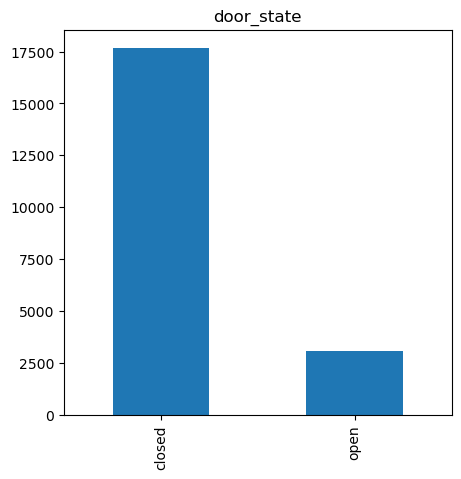

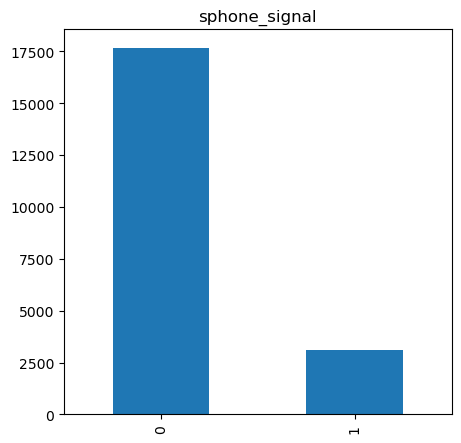

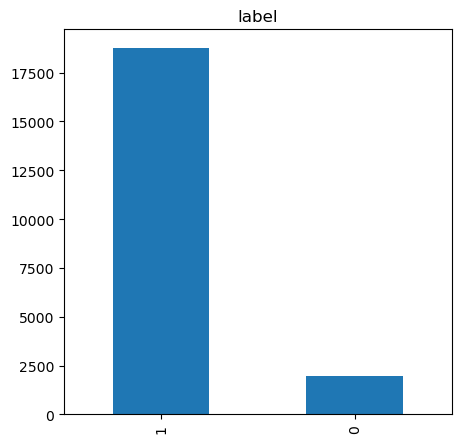

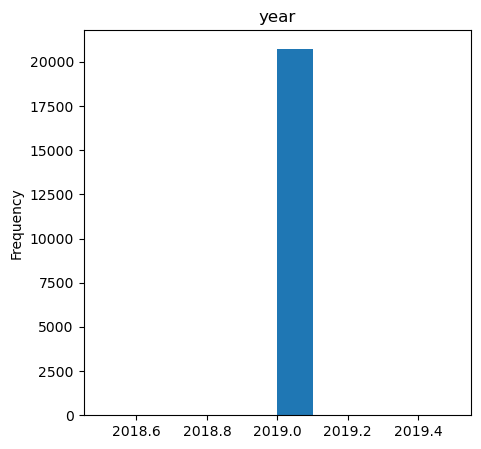

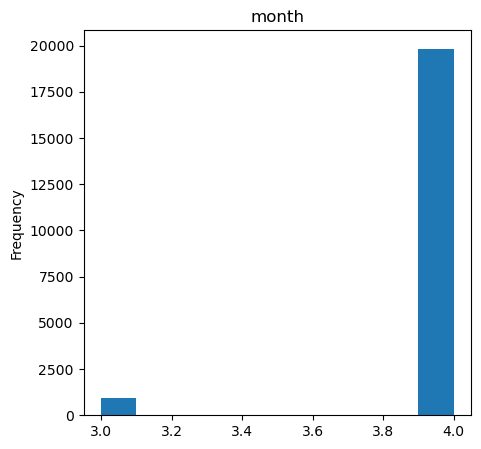

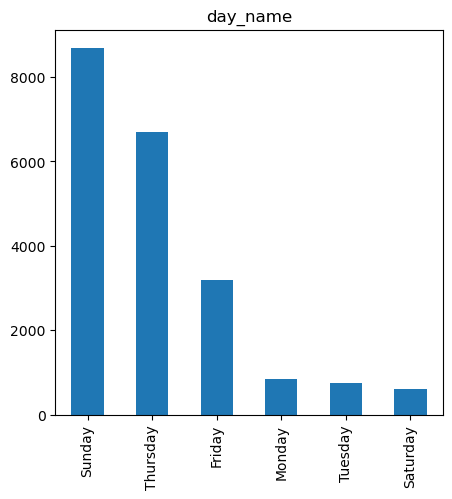

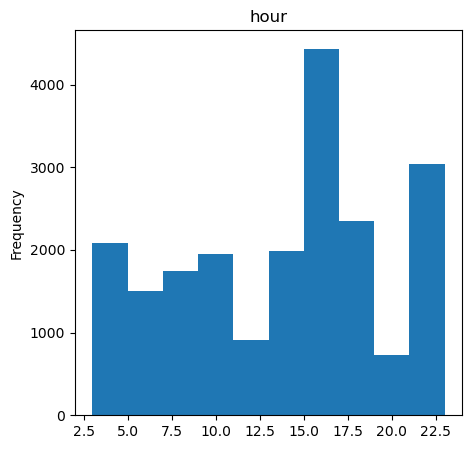

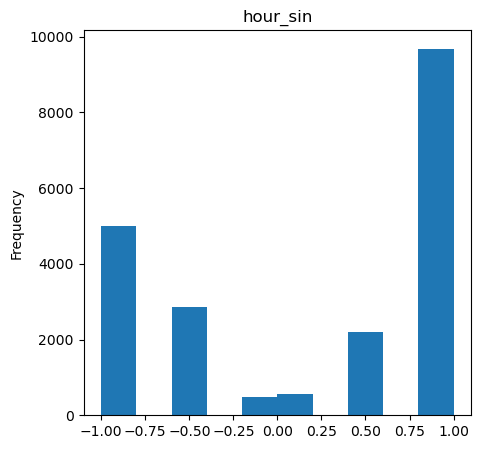

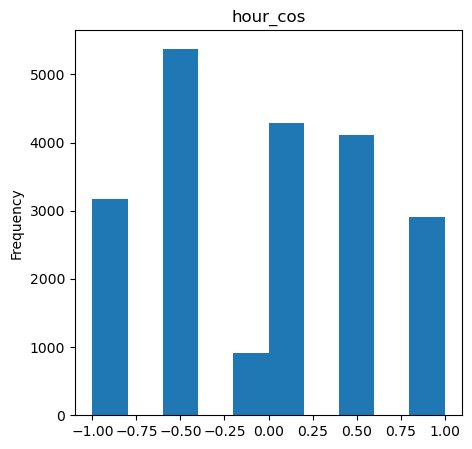

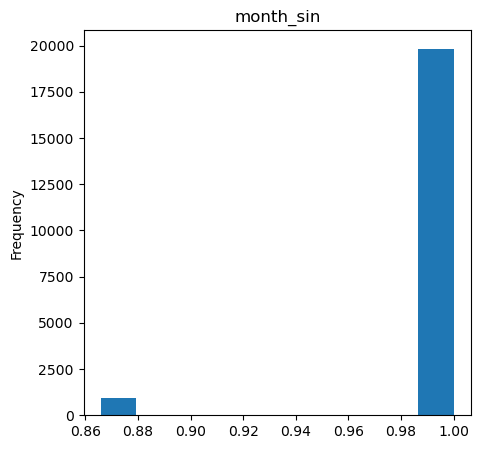

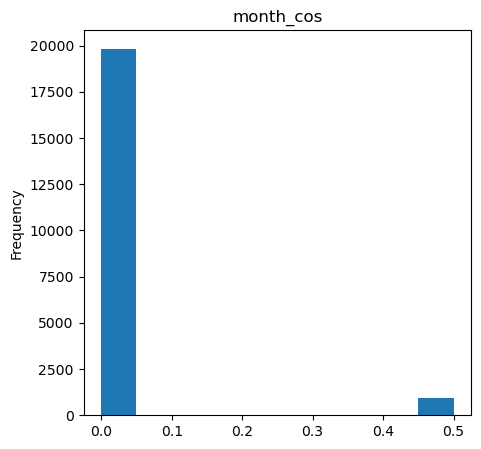

In [ ]:
# univariate analysis
for column in df:
   plt.figure(column, figsize = (5,5))
   plt.title(column)
   if is_numeric_dtype(df[column]):
       df[column].plot(kind = 'hist')
   elif is_string_dtype(df[column]):
       df[column].value_counts()[:10].plot(kind = 'bar')


In [ ]:
df

,door_state,sphone_signal,label,year,month,day_name,hour,hour_sin,hour_cos,month_sin,month_cos
0,closed,0,1,2019,4,Thursday,14,0.5,8.660254e-01,1.0,6.123234e-17
1,closed,0,1,2019,4,Thursday,14,0.5,8.660254e-01,1.0,6.123234e-17
2,closed,0,1,2019,4,Thursday,14,0.5,8.660254e-01,1.0,6.123234e-17
3,closed,0,1,2019,4,Thursday,14,0.5,8.660254e-01,1.0,6.123234e-17
4,closed,0,1,2019,4,Thursday,14,0.5,8.660254e-01,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
59307,open,1,0,2019,4,Tuesday,4,1.0,6.123234e-17,1.0,6.123234e-17
59421,closed,0,0,2019,4,Tuesday,4,1.0,6.123234e-17,1.0,6.123234e-17
59425,open,1,0,2019,4,Tuesday,4,1.0,6.123234e-17,1.0,6.123234e-17
59566,open,1,0,2019,4,Tuesday,4,1.0,6.123234e-17,1.0,6.123234e-17


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['label']
for i in categorical_features:
   df[i] = LabelEncoder().fit_transform(df[i])

In [ ]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['day_name', 'door_state','sphone_signal'],return_df=True)

In [ ]:
df=encoder.fit_transform(df)

In [ ]:
list(df.columns)

['door_state_0',
 'door_state_1',
 'sphone_signal_0',
 'sphone_signal_1',
 'label',
 'year',
 'month',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [ ]:
df

,door_state_0,door_state_1,sphone_signal_0,sphone_signal_1,label,year,month,day_name_0,day_name_1,day_name_2,hour,hour_sin,hour_cos,month_sin,month_cos
0,0,1,0,1,1,2019,4,0,0,1,14,0.5,8.660254e-01,1.0,6.123234e-17
1,0,1,0,1,1,2019,4,0,0,1,14,0.5,8.660254e-01,1.0,6.123234e-17
2,0,1,0,1,1,2019,4,0,0,1,14,0.5,8.660254e-01,1.0,6.123234e-17
3,0,1,0,1,1,2019,4,0,0,1,14,0.5,8.660254e-01,1.0,6.123234e-17
4,0,1,0,1,1,2019,4,0,0,1,14,0.5,8.660254e-01,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59307,1,0,1,0,0,2019,4,1,0,0,4,1.0,6.123234e-17,1.0,6.123234e-17
59421,0,1,0,1,0,2019,4,1,0,0,4,1.0,6.123234e-17,1.0,6.123234e-17
59425,1,0,1,0,0,2019,4,1,0,0,4,1.0,6.123234e-17,1.0,6.123234e-17
59566,1,0,1,0,0,2019,4,1,0,0,4,1.0,6.123234e-17,1.0,6.123234e-17


<AxesSubplot:>

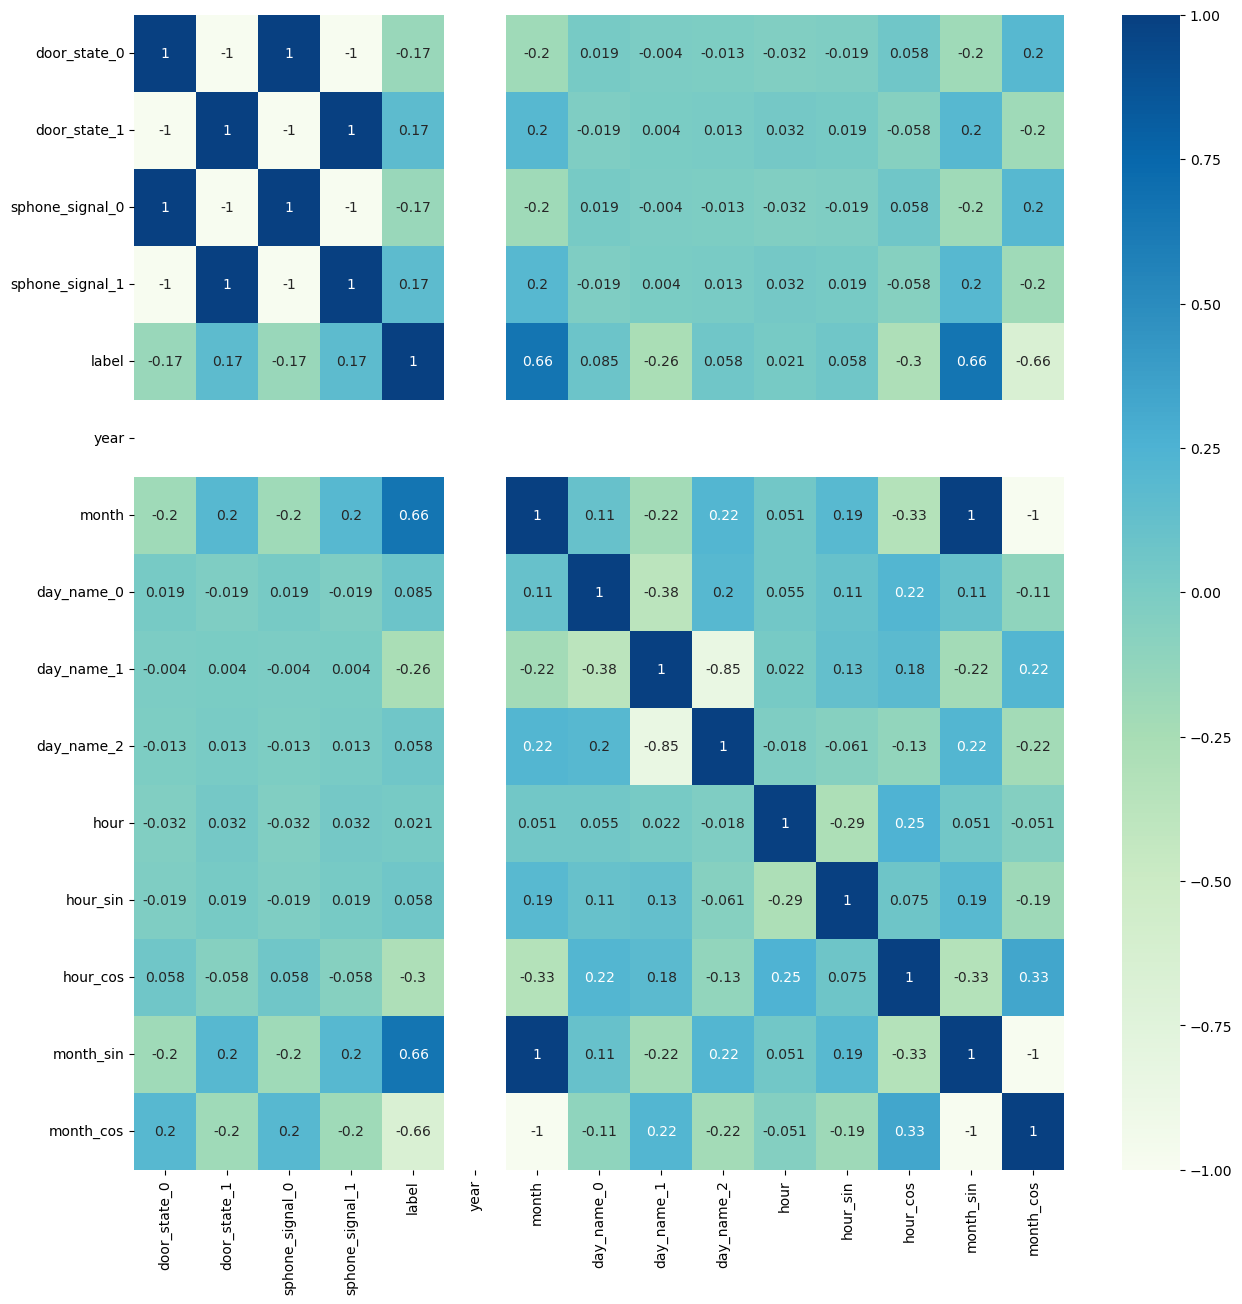

In [ ]:
# multivariate analysis
plt.figure(1, figsize = (15,15))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)


In [ ]:
# select and rearrange columns
df = df[['door_state_0',
 'door_state_1',
 'sphone_signal_0',
 'sphone_signal_1',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos', 'label']]

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold

X = df.iloc[:,:-1]
y = df["label"]

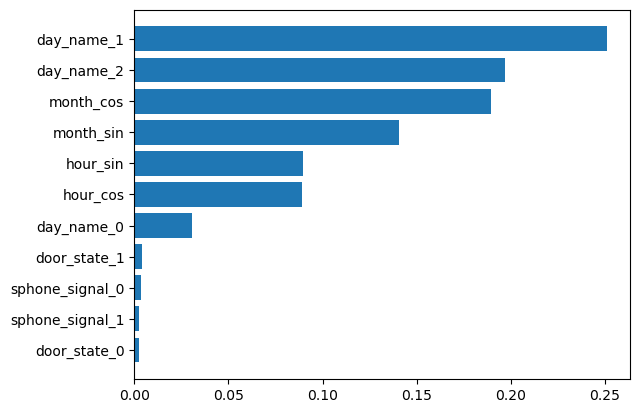

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

X = df.iloc[:,:-1]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn import datasets


sfm = SelectFromModel(rf, threshold=0.05)
sfm.fit(X_train, y_train)
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_important_train, y_train)
y_pred = rf.predict(X_important_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       592
           1       1.00      1.00      1.00      5634

    accuracy                           1.00      6226
   macro avg       1.00      1.00      1.00      6226
weighted avg       1.00      1.00      1.00      6226

